# Module 1: Data validation process

In [73]:
#import libraries for access and functional purpose
import pandas as p
import numpy as n
import matplotlib.pyplot as plt
import seaborn as s

In [74]:
import warnings
#warnings.filterwarnings('ignore')

In [75]:
#read the given dataset
df = p.read_csv("data.csv")

In [76]:
df.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,03-May,yes,2,left,right_up,no,recurrence-events


General Properties of Analysing the given dataset

In [77]:
df.tail()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
281,50-59,ge40,30-34,06-Aug,yes,2,left,left_low,no,no-recurrence-events
282,50-59,premeno,25-29,03-May,yes,2,left,left_low,yes,no-recurrence-events
283,30-39,premeno,30-34,06-Aug,yes,2,right,right_up,no,no-recurrence-events
284,50-59,premeno,15-19,0-2,no,2,right,left_low,no,no-recurrence-events
285,50-59,ge40,40-44,0-2,no,3,left,right_up,no,no-recurrence-events


In [78]:
#show columns
df.columns

Index(['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig',
       'breast', 'breast-quad', 'irradiat', 'Class'],
      dtype='object')

In [79]:
#shape of the dataframe
df.shape

(286, 10)

In [80]:
#To describe the dataframe
df.describe()

,deg-malig
count,286.000000
mean,2.048951
std,0.738217
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


In [81]:
#Checking datatype and information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
age            286 non-null object
menopause      286 non-null object
tumor-size     286 non-null object
inv-nodes      286 non-null object
node-caps      278 non-null object
deg-malig      286 non-null int64
breast         286 non-null object
breast-quad    285 non-null object
irradiat       286 non-null object
Class          286 non-null object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [82]:
df.dtypes

age            object
menopause      object
tumor-size     object
inv-nodes      object
node-caps      object
deg-malig       int64
breast         object
breast-quad    object
irradiat       object
Class          object
dtype: object

In [83]:
df[df.dtypes[df.dtypes == 'object'].index].describe()

,age,menopause,tumor-size,inv-nodes,node-caps,breast,breast-quad,irradiat,Class
count,286,286,286,286,278,286,285,286,286
unique,6,3,11,7,2,2,5,2,2
top,50-59,premeno,30-34,0-2,no,left,left_low,no,no-recurrence-events
freq,96,150,60,213,222,152,110,218,201


In [84]:
p.Categorical(df['tumor-size']).describe()

,counts,freqs
categories,,
0-4,8,0.027972
05-Sep,4,0.013986
15-19,30,0.104895
20-24,50,0.174825
25-29,54,0.188811
30-34,60,0.209790
35-39,19,0.066434
40-44,22,0.076923
45-49,3,0.010490


In [85]:
df['Class'].value_counts()

no-recurrence-events    201
recurrence-events        85
Name: Class, dtype: int64

In [86]:
df['inv-nodes'].value_counts()

0-2       213
03-May     36
06-Aug     17
09-Nov     10
15-17       6
Dec-14      3
24-26       1
Name: inv-nodes, dtype: int64

In [87]:
#Checking for duplicate data
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
281    False
282    False
283    False
284    False
285    False
Length: 286, dtype: bool

In [88]:
#find sum of duplicate data
sum(df.duplicated())

14

In [89]:
#Checking sum of missing values
df.isnull().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiat       0
Class          0
dtype: int64

In [90]:
#Checking for missing values if any
df.isnull().any()

age            False
menopause      False
tumor-size     False
inv-nodes      False
node-caps       True
deg-malig      False
breast         False
breast-quad     True
irradiat       False
Class          False
dtype: bool

In [91]:
#Checking the value of Gender 
df ['breast-quad'].unique()

array(['left_up', 'central', 'left_low', 'right_up', 'right_low', nan],
      dtype=object)

In [92]:
df.nunique()

age             6
menopause       3
tumor-size     11
inv-nodes       7
node-caps       2
deg-malig       3
breast          2
breast-quad     5
irradiat        2
Class           2
dtype: int64

To validate Age values

In [93]:
#Checking minimum or maximum age
print("Minimum age is:", df.age.min())
print("Maximun age is:", df.age.max())

Minimum age is: 20-29
Maximun age is: 70-79


In [94]:
#check the age range
print("Age range:", sorted(df['age'].unique()))

Age range: ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']


In [95]:
df['Class'].unique()

array(['recurrence-events', 'no-recurrence-events'], dtype=object)

In [96]:
NotHealthy = df.loc[df['Class'] == 'recurrence-events']
Healthy = df.loc[df['Class'] == 'no-recurrence-events']

In [97]:
n_persons = df.shape[0]   ##number of persons
n_features = df.shape[1]-1 ##number of features

NH = NotHealthy.shape[0]
H = Healthy.shape[0] 
 

print ("total number of patients:", n_persons)

print ("total num of Not Healthy patients of breast cancer (After Treatment):",NH )
print ("total num of Healthy patients of breast cancer(After Treatment):", H)


total number of patients: 286
total num of Not Healthy patients of breast cancer (After Treatment): 85
total num of Healthy patients of breast cancer(After Treatment): 201


In [98]:
import matplotlib.pyplot as plt

Number of Patient Age Details :
50-59    96
40-49    90
60-69    57
30-39    36
70-79     6
20-29     1
Name: age, dtype: int64


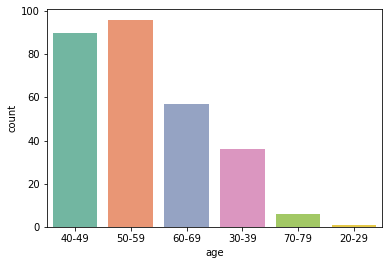

In [99]:
print("Number of Patient Age Details :")
print(df['age'].value_counts())
s.countplot(x='age', data=df, palette = 'Set2')

In [100]:
NotHealthy = df.loc[df['Class'] == 'recurrence-events']
Healthy = df.loc[df['Class'] == 'no-recurrence-events']

Type of Patients :


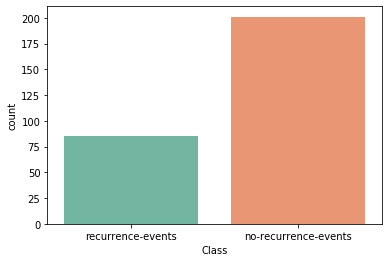

In [101]:
import seaborn as s
print("Type of Patients :")

s.countplot(x='Class', data=df, palette = 'Set2')



Text(0, 0.5, 'Age of Persons')

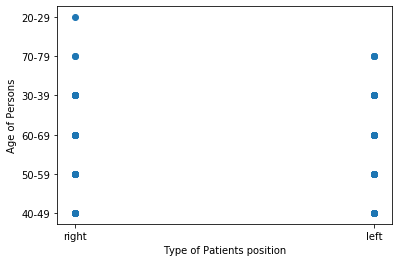

In [102]:

import matplotlib.pyplot as plt
plt.scatter(df['breast'],df['age'])
plt.xlabel('Type of Patients position')
plt.ylabel('Age of Persons')



Text(0, 0.5, 'tumor-size of Patients')

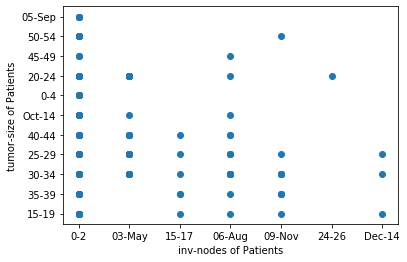

In [103]:

import matplotlib.pyplot as plt
plt.scatter(df['inv-nodes'],df['tumor-size'])
plt.xlabel('inv-nodes of Patients')
plt.ylabel('tumor-size of Patients')



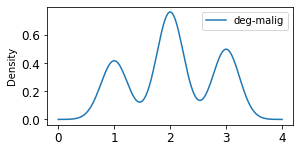

In [104]:
#Density Plots
plt = df.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False, 
                     sharey=False,fontsize=12, figsize=(15,10))


left_low     38.46
left_up      33.92
right_up     11.54
right_low     8.39
central       7.34
Name: breast-quad, dtype: float64

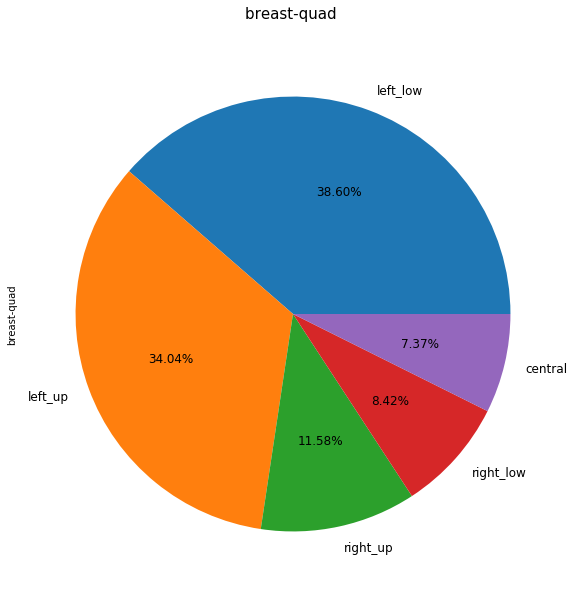

In [105]:
def PropByVar(df, variable):
    dataframe_pie = df[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 12);
    ax.set_title(variable + ' \n', fontsize = 15);
    return n.round(dataframe_pie/df.shape[0]*100,2)


PropByVar(df, 'breast-quad')

2    45.45
3    29.72
1    24.83
Name: deg-malig, dtype: float64

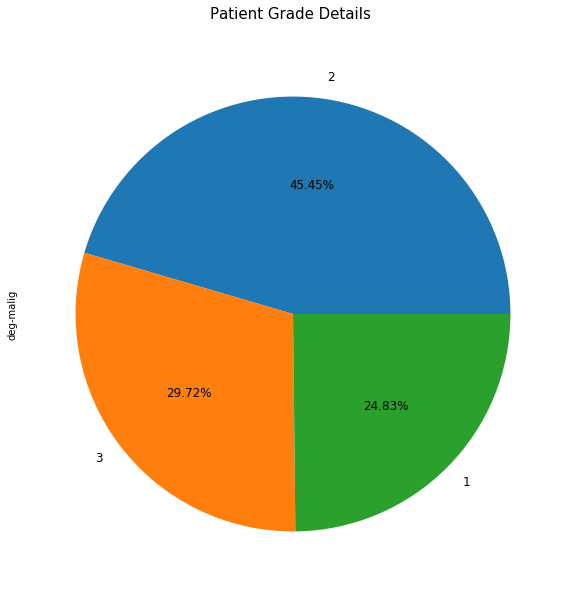

In [106]:
def PropByVar(df, variable):
    dataframe_pie = df[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 12);
    ax.set_title('Patient Grade Details \n', fontsize = 15);
    return n.round(dataframe_pie/df.shape[0]*100,2)


PropByVar(df, 'deg-malig')

In [107]:
def type_bar_plot(df, bygroup):
    dataframe_by_Group = p.crosstab(df[bygroup], columns=df.Class, normalize = 'index')
    dataframe_by_Group = n.round((dataframe_by_Group * 100), decimals=2)
    ax = dataframe_by_Group.plot.bar(figsize=(10,5));
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);
    ax.set_xticklabels(dataframe_by_Group.index,rotation = 0, fontsize = 15);
    ax.set_title('\n  (Type of Patients VS  ' + dataframe_by_Group.index.name + ')\n', fontsize = 15)
    ax.set_xlabel(dataframe_by_Group.index.name, fontsize = 12)
    ax.set_ylabel('(%)', fontsize = 12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
    rects = ax.patches

    # Add Data Labels

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 
                height + 2, 
                str(height)+'%', 
                ha='center', 
                va='bottom',
                fontsize = 12)
    return dataframe_by_Group



Class,no-recurrence-events,recurrence-events
tumor-size,,
0-4,87.50,12.50
05-Sep,100.00,0.00
15-19,76.67,23.33
20-24,68.00,32.00
25-29,66.67,33.33
30-34,58.33,41.67
35-39,63.16,36.84
40-44,72.73,27.27
45-49,66.67,33.33


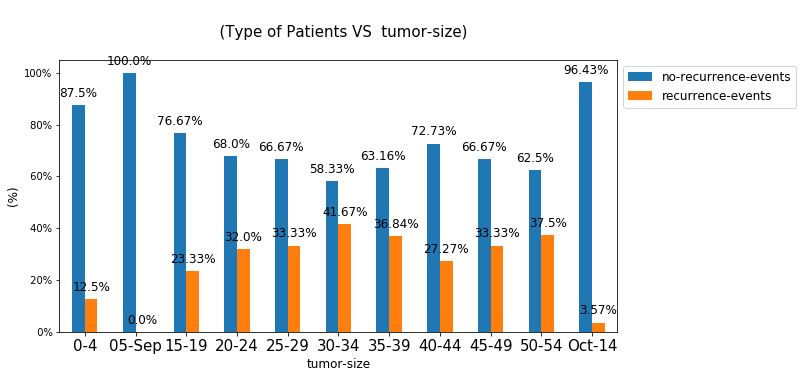

In [108]:
type_bar_plot(df, 'tumor-size')